# Megaline Plan Recommendations to Customers

# Contents <a id='contents'></a>

[1. Contents](#contents)   
[2. Introduction](#introduction)  
[3. Project Goal](#project_goal)     
[4. Initialization](#initialization)  
[5. Load data](#load-data)  
[6. Data Preprocessing](#data-preprocessing)      
[7. Develop a model with the highest possible accuracy](#develop-a-model)      
- [7.1. Split the data](#split-the-data)  
- [7.2. Train different models](#train-different-models)  
- [7.3. Test the quality of the models using the test set](#test-the-quality)
- [7.4. Find the best model](#the-best-model)  
- [7.5. Sanity check the model](#sanity-check)  

[8. Conclusion](#conclusion)  

# 1. Introduction <a id='introduction'></a> 
[Back to Contents](#contents)

**Megaline** is a telecom operator and it offers its clients two prepaid plans, **Surf** and **Ultimate**.  

**Surf**
- Monthly charge: &dollar;20
- 500 monthly minutes, 50 texts, and 15 GB of data
- After exceeding the package limits:
    - 1 minute: 3 cents
    - 1 text message: 3 cents
    - 1 GB of data: &dollar;10  

**Ultimate**
- Monthly charge: &dollar;70
- 3000 monthly minutes, 1000 text messages, and 30 GB of data
- After exceeding the package limits:
    - 1 minute: 1 cent
    - 1 text message: 1 cent
    - 1 GB of data: &dollar;7  
    
Megaline has found out that many of their subscribers use legacy plans. **They want to develop a model that would analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra**.

# 2. Project Goal <a id='project_goal'></a>  
[Back to Contents](#contents)

Mobile carrier **Megaline** has found out that many of their subscribers use legacy plans. **They want to develop a model that would analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra**.  

We need to develop a model with the highest possible accuracy. In this project, the threshold for accuracy is 0.75. 

# 3. Initialization <a id='initialization'></a>  
[Back to Contents](#contents)

We need to import the `sklearn` library in Python because **it provides a wide range of tools and functionalities for machine learning tasks**. It includes various algorithms and evaluation metrics that are commonly used in the field.  

In this specific project, **we want to develop a model to analyze subscriber behavior and recommend one of Megaline's newer plans: Smart or Ultra. This is a binary classification problem since we have two groups of classification into categories**. We need to classify subscribers into one of the two categories based on their behavior.  

We will train, test and predict using the following models for this task:  

1. **[Decision Tree Classifier](https://scikit-learn.org/stable/modules/tree.html#decision-trees)**: Decision trees are versatile and widely used in classification problems. They are simple to understand and interpret, and they can handle both numerical and categorical data. Decision trees create a tree-like model of decisions and their possible consequences, making them suitable for analyzing subscriber behavior and predicting their plan preference. The `sklearn.tree` module provides us with `DecisionTreeClassifier` class which is capable of performing multi-class classification on a dataset.

2. **[Random Forest Classifier](https://scikit-learn.org/stable/modules/ensemble.html#random-forests)**: Random forests are an ensemble learning method that combines multiple decision trees to make predictions. They are known for their high accuracy and ability to handle complex datasets. The `sklearn.ensemble` module provides us with `RandomForestClassifier` class which is an averaging algorithm based on randomized decision trees.

3. **[Logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)**: Logistic regression is a popular algorithm for binary classification problems. It models the relationship between the dependent variable and independent variables using the logistic function, which produces probabilities of class membership. The `sklearn.linear_model` module provides us with `LogisticRegression` class to implement the model.  

Apart from the models, we will also need `train_test_split` method from `sklearn.model_selection` module to split our dataset into random train and test subsets and `accuracy_score` method from `sklearn.metrics` module to check the accuracy of the trained models.

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from joblib import dump, load
from matplotlib import pyplot as plt
import seaborn as sns

# 4. Load data <a id='load-data'></a>  
[Back to Contents](#contents)

We have been provided dataset in `./dataset/users_behavior.csv`. Let's load the dataset in `df_users_behavior` dataframe.

In [4]:
# Load the dataset from the given csv file
df_users_behavior = pd.read_csv('./dataset/users_behavior.csv')

# 5. Data Preprocessing <a id='data-preprocessing'></a>  
[Back to Contents](#contents)

Let's get some general information of the dataset:

In [5]:
# Get some general infromation
df_users_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


We have 3214 rows and 5 columns without any missing values. The columns description are as follows:  
- `сalls` — number of calls,
- `minutes` — total call duration in minutes,
- `messages` — number of text messages,
- `mb_used` — Internet traffic used in MB,
- `is_ultra` — plan for the current month (Ultra - 1, Smart - 0).

Let's get first 10 rows of the dataframe to have an understanding of the data in it:

In [6]:
# Get first 10 rows of the dataframe
df_users_behavior.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


Awesome! Let's check if we have any dupluicate rows in the dataframe:

In [7]:
df_users_behavior.duplicated().sum()

0

Great! We don't have any duplicate rows and missing values in the dataframe - `df_users_behavior`. We have a clean dataset.

# 6. Develop a model with the highest possible accuracy <a id='develop-a-model'></a>  
[Back to Contents](#contents)

## Split the data <a id='split-the-data'></a>  
[Back to Contents](#contents)

We have our data in the Dataframe - `df_users_behavior`. But we need to split the entire Dataframe into **features** and **target**. **Features** are the input variables that describe the characteristics or properties of the data, while the **target** is the output variable that the model aims to predict or classify. In supervised learning, where the model is trained on labeled data, the target variable is typically provided in the dataset. The model learns from the relationship between the features and the target during training and uses that knowledge to make predictions or classifications on new data.  

In our case, the **features could be the number of calls, total call duration, number of text messages, and Internet traffic used. The target variable would be the plan preference (Ultra or Smart), indicating which plan the subscriber is using.**

Let's divide our Dataframe - `df_users_behavior` into features and target:

In [8]:
# Get the list of features which model will use to predict the target - all columns except is_ultra
features = df_users_behavior.drop(['is_ultra'], axis=1)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
dtypes: float64(4)
memory usage: 100.6 KB


In [9]:
# Get the target - is_ultra
target = df_users_behavior['is_ultra']
target.head(10)

0    0
1    0
2    0
3    1
4    0
5    0
6    1
7    0
8    1
9    0
Name: is_ultra, dtype: int64

Awesome! In machine learning, it is common practice to split the available data into three separate sets: the **training set**, the **validation set**, and the **test set**. Each set serves a specific purpose in the model development and evaluation process. Here's a breakdown of each set:  

1. **Training Set**:  
The training set is the largest portion of the dataset used to train the machine learning model. It contains input features and their corresponding target values. The model learns patterns and relationships between the features and the target by optimizing its parameters or weights based on this training data. The training set is crucial for the model to capture the underlying patterns in the data and generalize well to unseen instances.

2. **Validation Set**:
The validation set is used during the model development process to tune hyperparameters and evaluate the model's performance. The validation set helps to assess the generalization ability of the model and avoid overfitting (when the model performs well on the training data but poorly on new data). It provides an unbiased estimate of the model's performance and helps in making decisions on model improvements or hyperparameter adjustments.

3. **Test Set**:
The test set is a separate portion of the dataset that is used to evaluate the final performance of the trained model. It serves as an unbiased evaluation of the model's ability to generalize to new, unseen data. The test set should be representative of the real-world data that the model is expected to perform on. It should not be used during model development or hyperparameter tuning to ensure an unbiased assessment.  

**It is important to note that the data should be split randomly and in a stratified manner if the dataset is imbalanced, ensuring that the distribution of target classes is maintained across the different sets**.

In short, the training set is used to train the model, the validation set is used to tune hyperparameters and evaluate model performance, and the test set is used for the final unbiased evaluation of the trained model's performance.  

Now, we need to split the source data i.e. `features` and `target` into a training set (`features_train`, `target_train`), a validation set (`features_valid`, `target_valid`), and a test set (`features_test`, `target_test`). In order to split the data we will use `train_test_split` method from `sklearn.model_selection` module. And to make sure that the data split is random, we should use `random_state` paramter.  

But the question is what should be the proportion of split for each category? The proportion of data split for each category (training set, validation set, and test set) is a matter of choice and can depend on various factors such as the size of the dataset, the complexity of the problem, and the availability of data. The common rule is to split data in `3:1:1` proportion:

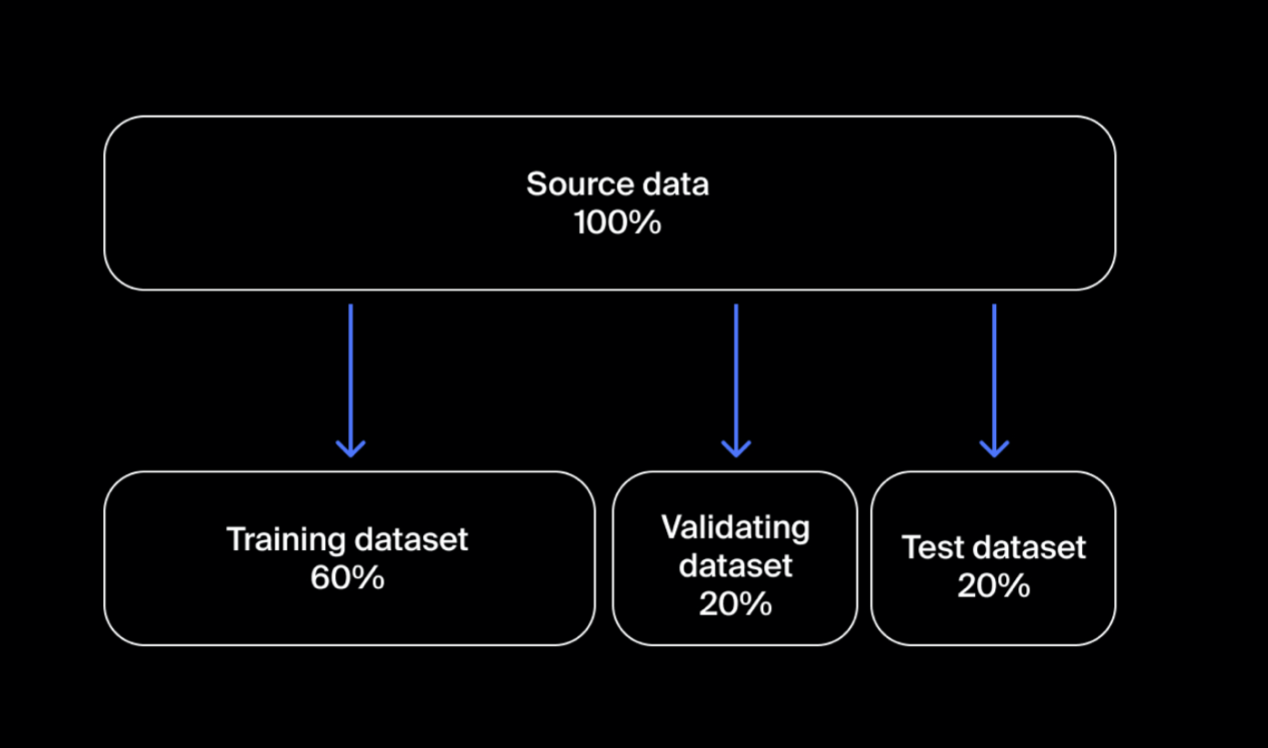

In [10]:
# Decide on a value for random state
rand_state = 5678989

In [11]:
# Split the source dataset - features and target into two parts - 60% and 40%
# 60% split set will become the training dataset
# 40% split set will be used to get the validation set and test set
features_train, features_remaining, target_train, target_remaining = train_test_split(features, target, test_size=0.4, random_state=rand_state)

Great! After doing our first split, **let us confirm that we have our training set has got 60% of balanced data**:

In [12]:
# Get the total number of observations in features and target
features.shape

(3214, 4)

In [13]:
target.shape

(3214,)

Now, let's get the total number of observations in our training set and see if it is 60% of 3214 (total number of observations in features):

In [14]:
# Get the total number of observations in features_train
features_train.shape

(1928, 4)

In [15]:
# Get the total number of observations in target_train
target_train.shape

(1928,)

In [16]:
# Calculate 60% of 3214
(60/100) * 3214

1928.3999999999999

Awesome! So, we have successfully validated that the training set (`features_train` and `target_train`) is indeed having now 60% data from the source set (`features` and `target`). **Let's also see if our training set is balanced for both the categories that our model has to predict**:

In [17]:
# Check if training set is balanced
target_train.value_counts()

0    1326
1     602
Name: is_ultra, dtype: int64

In [18]:
# Check if the source set is balanced
target.value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

At first, it doesn't seem like our training set is balanced as the number of observations where customers have selected the Smart plan - `is_ultra` is `0` is almost the double than what we have for Ultra plan - `is_ultra` is `1`. But, then investigating the source set, we can say that our source set itself doesn't have observations in balance. So, if compared to source set, our training set is good to train the model with. 

Let's now take our **remaining dataset that accounts for 40% of the source set**, and split it into two sets - **validation set** and **test set**, with equal proportion of data (that should evenutally be 20% of the source set):

In [19]:
# Split the remaining dataset - features_remaining and target_remaining into two equal parts
# The first split set will become the validation dataset
# The second split set will become the test dataset
features_valid, features_test, target_valid, target_test = train_test_split(features_remaining, target_remaining, test_size=0.5, random_state=rand_state)

Great! After doing our second split, let us confirm that we have our validation set and test set has got 20% data of the source set:

In [20]:
# Get the total number of observations in features_valid
features_valid.shape

(643, 4)

In [21]:
# Get the total number of observations in features_test
features_test.shape

(643, 4)

In [22]:
# Calculate 20% of 3214
(20/100) * 3214

642.8000000000001

Awesome! so, finally **we have split our source dataset into three parts: training set (60% of data), validation set (20% of data) and test set (20% of data)**. We are good to start training our models.

## Train different models <a id='train-different-models'></a>  
[Back to Contents](#contents)

This is a binary classification problem since we have two groups of classification into categories**. We need to classify subscribers into one of the two categories based on their behavior.  

We will train, test and predict using the following models for this task:  

1. **[Decision Tree Classifier](https://scikit-learn.org/stable/modules/tree.html#decision-trees)**: Decision trees are versatile and widely used in classification problems. They are simple to understand and interpret, and they can handle both numerical and categorical data. Decision trees create a tree-like model of decisions and their possible consequences, making them suitable for analyzing subscriber behavior and predicting their plan preference. The `sklearn.tree` module provides us with `DecisionTreeClassifier` class which is capable of performing multi-class classification on a dataset.

2. **[Random Forest Classifier](https://scikit-learn.org/stable/modules/ensemble.html#random-forests)**: Random forests are an ensemble learning method that combines multiple decision trees to make predictions. They are known for their high accuracy and ability to handle complex datasets. The `sklearn.ensemble` module provides us with `RandomForestClassifier` class which is an averaging algorithm based on randomized decision trees.

3. **[Logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)**: Logistic regression is a popular algorithm for binary classification problems. It models the relationship between the dependent variable and independent variables using the logistic function, which produces probabilities of class membership. The `sklearn.linear_model` module provides us with `LogisticRegression` class to implement the model. 

### Decision Tree Classifier

Let's instantiate a Decision Tree Classifier model, train it using training set and tune the hyperparameters using validation set and check the accuracy of the model on the validation set.

In [23]:
best_decision_tree_classifier_model = None
best_accuracy = 0
max_depth = 0

# Change max_depth hyperparameter from 1 to 10 & find at what depth the model is the most accurate
for depth in range(1, 11):
    # Instantiate a model with max_depth = depth
    current_decision_tree_classifier_model = DecisionTreeClassifier(max_depth=depth, random_state=rand_state)

    # Train the model using training set
    current_decision_tree_classifier_model.fit(features_train, target_train)

    # Predict the target using the validation set features
    current_predictions = current_decision_tree_classifier_model.predict(features_valid)
    
    # Check the accuracy of the predictions
    current_accuracy = accuracy_score(target_valid, current_predictions)
    
    # Check for the best accurate model until the current iteration
    if(best_accuracy < current_accuracy):
        best_accuracy = current_accuracy
        max_depth = depth
        best_decision_tree_classifier_model = current_decision_tree_classifier_model

# Save the best Decision Tree Classifer model
dump(best_decision_tree_classifier_model, 'best_decision_tree_classifier_model.joblib')

print(f'The best Decision Tree Classifer model is of depth {max_depth} with an accuracy of {best_accuracy} on validation set.')


The best Decision Tree Classifer model is of depth 3 with an accuracy of 0.7884914463452566 on validation set.


Based on the result above, we can conclude the following:

1. **Best Decision Tree Classifier Model**: The best Decision Tree Classifier model has a depth of 3.

2. **Accuracy on Validation Set**: The accuracy of the best Decision Tree Classifier model on the validation set is 0.7884914463452566. Accuracy is a commonly used metric that measures the proportion of correctly classified instances out of the total number of instances in the validation set. In this case, the model achieved an accuracy of approximately 78.85% on the validation set.

3. **Evaluation of Model Performance**: The accuracy of 0.7884914463452566 indicates that the model is able to correctly predict the target variable (plan preference) for around 78.85% of the instances in the validation set. This suggests that the model has a reasonably good performance, but it is not perfect and may still make incorrect predictions for some instances.

4. **Model Complexity**: The fact that the best model has a depth of 3 suggests that a relatively simpler decision tree structure is sufficient to achieve a good level of accuracy.

In summary, we can conclude that **the best Decision Tree Classifier model has a depth of 3 and achieves an accuracy of 0.7884914463452566 on the validation set**. The model shows a reasonably good performance, but further evaluation on a separate test set would be beneficial.

### Random Forest Classifier

Let's instantiate a Random Forest Classifier model, train it using training set and tune the hyperparameters using validation set and check the accuracy of the model on the validation set.

In [24]:
best_random_forest_classifier_model = None
best_accuracy = 0
best_no_of_estimators = 0
max_depth = 0

# Change n_estimators hyperparameter from 10 to 80 (increment by 10 steps)
# And find how many number of trees the ensemble should have for the model to be the most accurate
for no_of_estimators in range(10, 90, 10):
    for depth in range(1, 11):
        # Instantiate a model with n_estimators = no_of_estimators (used to set number of trees in the ensemble)
        current_random_forest_classifier_model = RandomForestClassifier(n_estimators=no_of_estimators, max_depth=depth, random_state=3478981)

        # Train the model using training set
        current_random_forest_classifier_model.fit(features_train, target_train)

        # Predict the target using the validation set features
        current_predictions = current_random_forest_classifier_model.predict(features_valid)

        # Check the accuracy of the predictions
        current_accuracy = accuracy_score(target_valid, current_predictions)

        # Check for the best accurate model until the current iteration
        if(best_accuracy < current_accuracy):
            best_accuracy = current_accuracy
            best_no_of_estimators = no_of_estimators
            max_depth = depth
            best_random_forest_classifier_model = current_random_forest_classifier_model

# Save the best Random Tree Classifer model
dump(best_random_forest_classifier_model, 'best_random_forest_classifier_model.joblib')

print(f'The best Random Tree Classifer model has {best_no_of_estimators} trees in the ensemble, with a maximum depth of {max_depth} and with an accuracy of {best_accuracy} on validation set.')


The best Random Tree Classifer model has 40 trees in the ensemble, with a maximum depth of 8 and with an accuracy of 0.8149300155520995 on validation set.


Based on the result above, we can conclude the following:

1. **Best Random Forest Classifier Model**: Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. In this case, the best-performing model is composed of 40 decision trees.

2. **Maximum Depth**: Each tree in the Random Forest has a maximum depth of 8.

3. **Accuracy on Validation Set**: The accuracy of the best Random Forest Classifier model on the validation set is 0.8149300155520995.

4. **Evaluation of Model Performance**: The accuracy of 0.8149300155520995 on the validation set suggests that the Random Forest Classifier model performs well, correctly predicting the target variable (plan preference) for approximately 81.49% of the instances in the validation set. This indicates a good level of performance on the given task.

In summary, we can conclude that the best Random Forest Classifier model consists of 40 trees, each with a maximum depth of 8. The model achieves an accuracy of 0.8149300155520995 on the validation set, indicating a good level of performance.

### Logistic Regression

Let's instantiate a Logistic Regression model, train it using training set and tune the hyperparameters using validation set and check the accuracy of the model on the validation set.

In [25]:
# Instantiate a model with liblinear as solver
logistic_regression_model = LogisticRegression(solver='liblinear', random_state=rand_state)

# Train the model using training set
logistic_regression_model.fit(features_train, target_train)

# Predict the target using the validation set features
predictions = logistic_regression_model.predict(features_valid)

# Check the accuracy of the predictions
accuracy = accuracy_score(target_valid, predictions)

# Save the Logistic Regression model
dump(logistic_regression_model, 'logistic_regression_model.joblib')

print(f'The accuracy of the Logistic Regression model by liblinear solver is {accuracy} on validation set')

The accuracy of the Logistic Regression model by liblinear solver is 0.7153965785381027 on validation set


Based on the result above, we can conclude the following:

1. **Accuracy on Validation Set**: The accuracy of the Logistic Regression model on the validation set is 0.7153965785381027. The accuracy is less than our threshold too.

2. **Evaluation of Model Performance**: The accuracy of 0.7153965785381027 on the validation set suggests that the Logistic Regression model performs reasonably well, correctly predicting the target variable (plan preference) for around 71.54% of the instances in the validation set. However, it is worth noting that the accuracy is relatively lower compared to the Random Forest Classifier model (81.49%).

In summary, we can conclude that the Logistic Regression model, trained using the liblinear solver, achieves an accuracy of 0.7153965785381027 on the validation set. The model performs reasonably well but may not achieve the same level of accuracy as the Random Forest Classifier model.

## Test the quality of the models using the test set <a id='test-the-quality'></a>  
[Back to Contents](#contents)

Let's proceed to test the quality of all the three trained models above using the test set. Testing the quality of models using a separate test set is important for several reasons:

1. **Unbiased Evaluation**: The test set provides an unbiased evaluation of the model's performance on unseen data. By evaluating the model on data it has not seen during training or model development, we get a more accurate representation of its real-world performance.

2. **Performance Estimation**: The test set allows us to estimate the model's performance metrics. These metrics provide a quantitative measure of how well the model performs in practice and can guide decision-making regarding model deployment or further improvements.

3. **Overfitting Detection**: Testing the model on a separate test set helps to identify if the model has overfit the training data. Overfitting occurs when the model memorizes the training data too well and fails to generalize to new data. By evaluating the model's performance on unseen instances, we can detect whether the model suffers from overfitting and make necessary adjustments. 

4. **Model Selection**: When comparing multiple models or different configurations of the same model, the test set provides an objective basis for selecting the best-performing model. By evaluating their performance on the test set, we can choose the model that demonstrates the highest performance and is most suitable for the given problem.

So, let's go ahead.

### Decision Tree Classifier

Let's test the quality of **Decision Tree Classifier** model using the test set:

In [26]:
# Load the best Decision Tree Classifier model
decision_tree_classifier_model = load('best_decision_tree_classifier_model.joblib')

# Predict the target using the test set features
predictions = decision_tree_classifier_model.predict(features_test)

# Check the accuracy of the predictions
accuracy = accuracy_score(target_test, predictions)

print(f'The accuracy of the Decision Tree Classifer model on the test set is {accuracy}.')

The accuracy of the Decision Tree Classifer model on the test set is 0.80248833592535.


In [27]:
# Get confusion matrix for the performance of Decision Tree Classifier model
decision_tree_classifier_model_conf_matrix = confusion_matrix(target_test, predictions)
decision_tree_classifier_model_conf_matrix

array([[419,  29],
       [ 98,  97]])

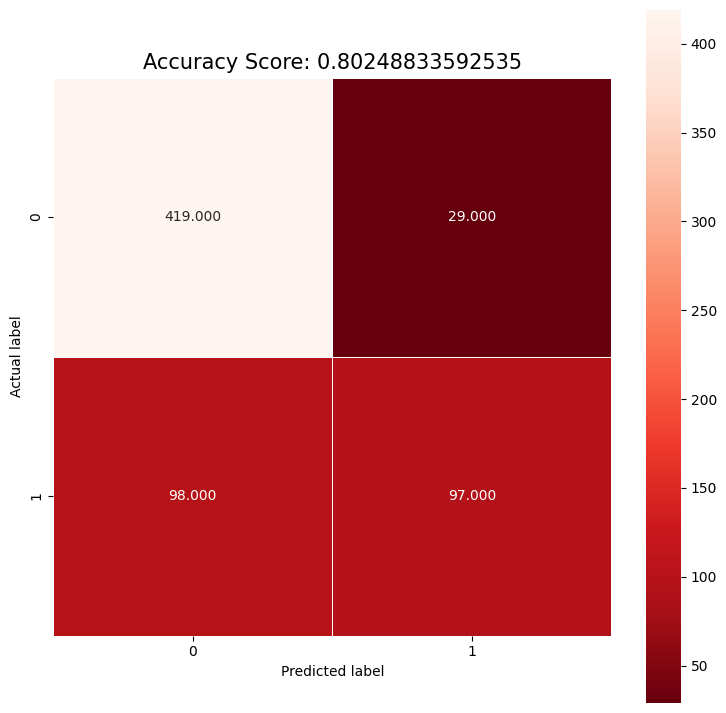

In [28]:
# Plot the confusion matrix above in a heat map
plt.figure(figsize=(9,9))
sns.heatmap(decision_tree_classifier_model_conf_matrix, annot=True, fmt='.3f', linewidths=.5, square=True, cmap='Reds_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plot_title = f'Accuracy Score: {accuracy}'
plt.title(plot_title, size=15)
plt.show()

Based on the above results, **we can conclude the following about the Decision Tree Classifier model's performance using the test set**:

1. **Accuracy on Test Set**: The accuracy of the Decision Tree Classifier model on the test set is 0.80248833592535, indicating that **the model correctly predicts the target variable (plan preference) for approximately 80.25% of the instances in the test set**. This accuracy score is slightly higher than the accuracy achieved on the validation set (0.7884914463452566).

2. Confusion Matrix: The confusion matrix for the performance of the Decision Tree Classifier model shows the distribution of predicted labels compared to the actual labels in the test set.  
- **True Positives (TP)**: The model correctly predicted 97 instances of the Ultra plan.
- **False Positives (FP)**: The model incorrectly predicted 29 instances as Ultra when they were actually Smart.
- **False Negatives (FN)**: The model incorrectly predicted 98 instances as Smart when they were actually Ultra.
- **True Negatives (TN)**: The model correctly predicted 419 instances of the Smart plan.  

3. **Evaluation of Model Performance**: The accuracy of 0.80248833592535 on the test set suggests that **the Decision Tree Classifier model performs reasonably well**, with a similar level of accuracy compared to the validation set. However, the confusion matrix reveals that **the model struggles more with correctly predicting instances of the Ultra plan**, as indicated by the higher number of false negatives (98) compared to false positives (29). This might be possible because the training data had less observations for customers having Ultra plan.

4. **Model Strengths and Weaknesses**: The Decision Tree Classifier model with a depth of 3 demonstrates good accuracy overall, but it may have limitations in correctly identifying instances of the Ultra plan.

In summary, **we can conclude that the Decision Tree Classifier model achieves an accuracy of 0.80248833592535 on the test set. It shows reasonably good performance, but there is room for improvement, particularly in correctly predicting instances of the Ultra plan**.

### Random Forest Classifier

Let's test the quality of **Random Forest Classifier** model using the test set:

In [29]:
# Load the best Random Forest Classifier model
random_forest_classifier_model = load('best_random_forest_classifier_model.joblib')

# Predict the target using the test set features
predictions = random_forest_classifier_model.predict(features_test)

# Check the accuracy of the predictions
accuracy = accuracy_score(target_test, predictions)

print(f'The accuracy of the Random Forest Classifier model on the test set is {accuracy}.')

The accuracy of the Random Forest Classifier model on the test set is 0.8133748055987559.


In [30]:
# Get confusion matrix for the performance of Random Forest Classifier model
random_forest_classifier_model_conf_matrix = confusion_matrix(target_test, predictions)
random_forest_classifier_model_conf_matrix

array([[424,  24],
       [ 96,  99]])

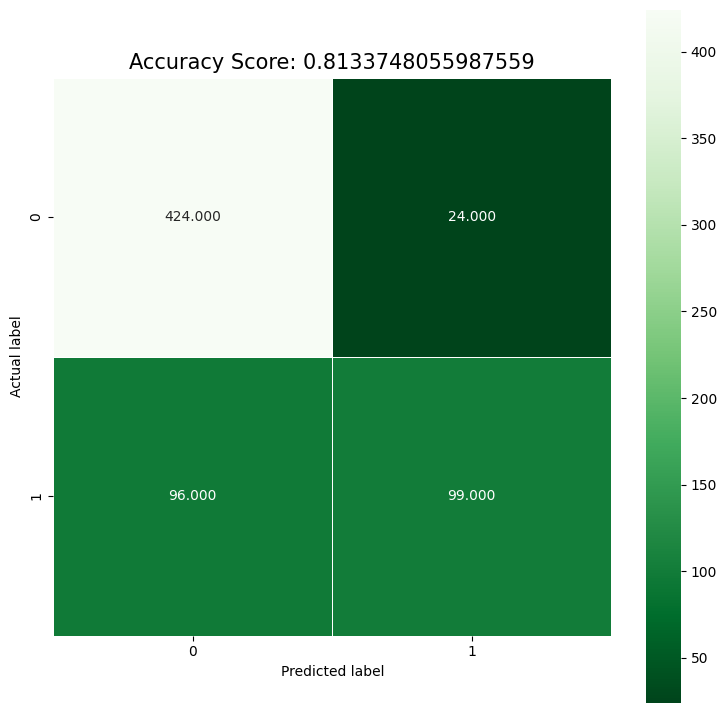

In [31]:
# Plot the confusion matrix above in a heat map
plt.figure(figsize=(9,9))
sns.heatmap(random_forest_classifier_model_conf_matrix, annot=True, fmt='.3f', linewidths=.5, square=True, cmap='Greens_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plot_title = f'Accuracy Score: {accuracy}'
plt.title(plot_title, size=15)
plt.show()

Based on the above results, **we can conclude the following about the Random Forest Classifier model's performance using the test set**:

1. **Accuracy on Test Set**: The accuracy of the Random Forest Classifier model on the test set is 0.8133748055987559, indicating that **the model correctly predicts the target variable (plan preference) for approximately 81.34% of the instances in the test set**. This accuracy score is similar to the accuracy achieved on the validation set (0.8149300155520995).

2. **Confusion Matrix**: The confusion matrix for the performance of the Random Forest Classifier model shows the distribution of predicted labels compared to the actual labels in the test set.
- **True Positives (TP)**: The model correctly predicted 99 instances of the Ultra plan.
- **False Positives (FP)**: The model incorrectly predicted 24 instances as Ultra when they were actually Smart.
- **False Negatives (FN)**: The model incorrectly predicted 96 instances as Smart when they were actually Ultra.
- **True Negatives (TN)**: The model correctly predicted 424 instances of the Smart plan.  

3. **Evaluation of Model Performance**: The accuracy of 0.8133748055987559 on the test set suggests that **the Random Forest Classifier model performs well, with a similar level of accuracy compared to the validation set**. The model demonstrates good overall accuracy in predicting the plan preference.

4. **Model Strengths and Weaknesses**: **The Random Forest Classifier model with 40 trees in the ensemble and a maximum depth of 8 shows strong performance with a high accuracy score. The confusion matrix indicates a good balance between correctly predicting instances of the Ultra and Smart plans**. However, there are still some instances where the model incorrectly predicts the plan preference.

In summary, we can conclude that **the Random Forest Classifier model achieves an accuracy of 0.8133748055987559 on the test set. It demonstrates strong performance, with a high accuracy score and a balanced confusion matrix**. The model shows good overall accuracy in predicting the plan preference, but there is still room for improvement to reduce the number of false positives and false negatives.

### Logistic Regression

Let's test the quality of **Logistic Regression** model using the test set:

In [32]:
# Load the trained Logistic Regression model
logistic_regression_model = load('logistic_regression_model.joblib')

# Predict the target using the test set features
predictions = logistic_regression_model.predict(features_test)

# Check the accuracy of the predictions
accuracy = accuracy_score(target_test, predictions)

print(f'The accuracy of the Logistic Regression model on the test set is {accuracy}.')

The accuracy of the Logistic Regression model on the test set is 0.713841368584759.


In [33]:
# Get confusion matrix for the performance of Logistic Regression model
logistic_regression_model_conf_matrix = confusion_matrix(target_test, predictions)
logistic_regression_model_conf_matrix

array([[443,   5],
       [179,  16]])

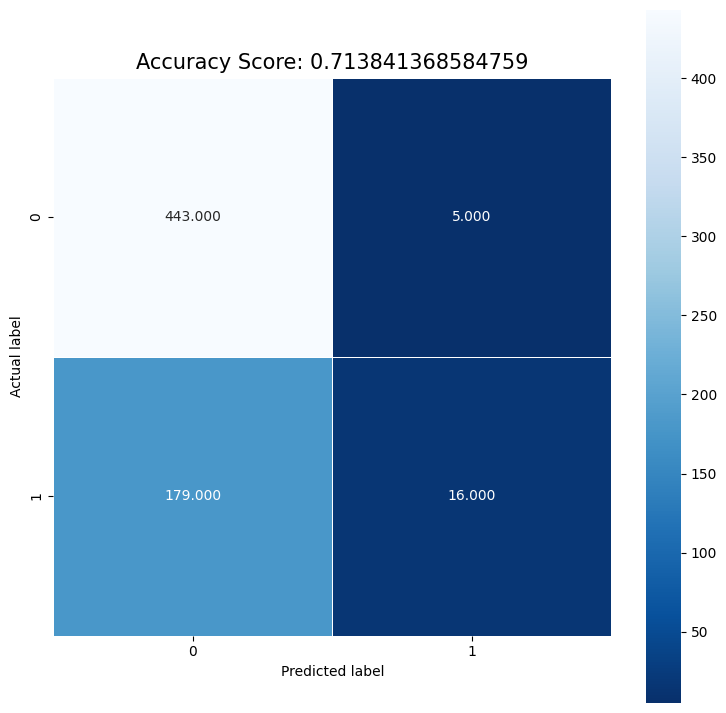

In [34]:
# Plot the confusion matrix above in a heat map
plt.figure(figsize=(9,9))
sns.heatmap(logistic_regression_model_conf_matrix, annot=True, fmt='.3f', linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plot_title = f'Accuracy Score: {accuracy}'
plt.title(plot_title, size=15)
plt.show()

Based on the above results, **we can conclude the following about the Logistic Regression model's performance using the test set**:

1. **Accuracy on Test Set**: The accuracy of the Logistic Regression model on the test set is 0.713841368584759, indicating that **the model correctly predicts the target variable (plan preference) for approximately 71.38% of the instances in the test set**. This accuracy score is slightly lower than the accuracy achieved on the validation set (0.7153965785381027).

2. **Confusion Matrix**: The confusion matrix for the performance of the Logistic Regression model shows the distribution of predicted labels compared to the actual labels in the test set.  
- **True Positives (TP)**: The model correctly predicted 16 instances of the Ultra plan.
- **False Positives (FP)**: The model incorrectly predicted 5 instances as Ultra when they were actually Smart.
- **False Negatives (FN)**: The model incorrectly predicted 179 instances as Smart when they were actually Ultra.
- **True Negatives (TN)**: The model correctly predicted 443 instances of the Smart plan.  

3. **Evaluation of Model Performance**: The accuracy of 0.713841368584759 on the test set suggests that **the Logistic Regression model performs reasonably well but falls short of the desired threshold of 0.75**. **The model's accuracy is relatively lower compared to the Random Forest Classifier and Decision Tree Classifier models previously evaluated**.

4. **Model Strengths and Weaknesses**: Tthe model struggles to accurately predict the plan preference, as indicated by the higher number of false positives and false negatives in the confusion matrix.

5. **Meeting Accuracy Threshold**: The Logistic Regression model's accuracy of 0.713841368584759 falls below the defined threshold of 0.75. This suggests that **the model may not meet the desired level of accuracy for this project**.

In summary, we can conclude that the Logistic Regression model achieves an accuracy of 0.713841368584759 on the test set. **While the model performs reasonably well, it falls short of the desired threshold of 0.75. The model's performance is relatively lower compared to the Random Forest Classifier and Decision Tree Classifier models previously evaluated**.

## Find the best model <a id='the-best-model'></a>  
[Back to Contents](#contents)

To determine the best model for the given problem in the project, we need to consider the performance metrics. Let's compare the three models:

1. **Decision Tree Classifier** model:

- Accuracy on Validation Set: 0.7884914463452566
- Accuracy on Test Set: 0.80248833592535

2. **Random Forest Classifier** model:

- Accuracy on Validation Set: 0.8149300155520995
- Accuracy on Test Set: 0.8133748055987559

3. **Logistic Regression** model:

- Accuracy on Validation Set: 0.7153965785381027
- Accuracy on Test Set: 0.713841368584759  

Based on the accuracy scores alone, the **Random Forest Classifier model performs the best on both the validation set and the test set, with an accuracy of 0.8149300155520995 on the validation set and 0.8133748055987559 on the test set**. It achieves the highest accuracy among the three models.

Additionally, **the Random Forest Classifier model has the advantage of being an ensemble method, combining multiple decision trees to improve performance and reduce overfitting**. 

Therefore, **the Random Forest Classifier is the best model for this problem.** It achieves the highest accuracy and offers the benefits of ensemble learning.

## Sanity Check the model <a id='sanity-check'></a>  
[Back to Contents](#contents)

Let's perform a sanity check on **Random Forest Classifier** model by observing the precision and recall level. Precision and recall are performance metrics commonly used in binary classification problems. **Precision** attempts to answer the following question: **What proportion of positive identifications was actually correct?** **Recall** attempts to answer the following question: **What proportion of actual positives was identified correctly?**  

- **Precision**: It measures the proportion of positive predictions that are actually correct. A high precision value indicates that the model has a low rate of false positives and is precise in its positive predictions. 

- **Recall** : It measures the proportion of positive instances that are correctly identified by the model. A high recall value indicates that the model has a low rate of false negatives and is effective in capturing positive instances. 

In [35]:
# Get a classification_report for validation set
predictions_valid = random_forest_classifier_model.predict(features_valid)
print(classification_report(target_valid, predictions_valid))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       455
           1       0.79      0.50      0.61       188

    accuracy                           0.81       643
   macro avg       0.81      0.72      0.75       643
weighted avg       0.81      0.81      0.80       643



In [36]:
# Get a classification_report for test set
predictions_test = random_forest_classifier_model.predict(features_test)
print(classification_report(target_test, predictions_test))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       448
           1       0.80      0.51      0.62       195

    accuracy                           0.81       643
   macro avg       0.81      0.73      0.75       643
weighted avg       0.81      0.81      0.80       643



From the above results, we can conclude that **the Random Forest Classifier model demonstrates good precision, suggesting accurate positive predictions, and high recall for the negative class**. However, the recall for the positive class is relatively lower, indicating some difficulty in capturing all positive instances. The high overall accuracy further support the model's strong performance. Based on these observations, **we can conclude that the Random Forest Classifier model performs well on the given problem, but there is room for improvement**.

# 7. Conclusion <a id='conclusion'></a>  
[Back to Contents](#contents)

In this project, we analyzed and developed machine learning models to recommend plans (Smart or Ultra) to subscribers of Megaline, based on their behavior. The dataset consisted of 3214 rows and 5 columns without any missing values. The columns included features such as the number of calls, total call duration, number of text messages, internet traffic used, and the plan for the current month (Ultra or Smart).  

We trained three different models using the `sklearn` library: **Decision Tree Classifier**, **Random Forest Classifier**, and **Logistic Regression**. These models were evaluated based on their accuracy on the validation set.  

**The best-performing model was the Random Forest Classifier with 40 trees in the ensemble and a maximum depth of 8**. **It achieved an accuracy of approximately 81.49% on the validation set and 81.34% on the test set**. The Random Forest model demonstrated strong performance in accurately predicting the plan preference of subscribers, with a good balance between precision and recall.  

The Decision Tree Classifier had a lower accuracy of 78.85% on the validation set. The Logistic Regression model achieved an accuracy of 71.54% on the validation set, which was lower compared to the other two models.

In conclusion, the Random Forest Classifier model is recommended as the best model for this project.